In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
data = pd.read_csv(r"C:\Users\ihett\Downloads\grazing.csv", sep = ";")
data

,site_id,grazingpressure,year,precipitation,primary_prod
0,1,0,1,"212,7","94,0"
1,1,0,2,"220,5","33,0"
2,1,0,3,105,"26,0"
3,1,0,4,"146,2","34,0"
4,1,0,5,306,"116,0"
...,...,...,...,...,...
643,24,"0,2",23,"263,3","18,0"
644,24,"0,2",24,"279,5","29,6"
645,24,"0,2",25,482,"82,2"
646,24,"0,2",26,"289,8","54,5"


In [17]:
data.isna().sum()

site_id            0
grazingpressure    0
year               0
precipitation      0
primary_prod       4
dtype: int64

In [18]:
data["primary_prod"] = data["primary_prod"].str.replace(",", ".")
data["primary_prod"] = pd.to_numeric(data["primary_prod"], errors='coerce')

data["precipitation"] = data["precipitation"].str.replace(",", ".")
data["precipitation"] = pd.to_numeric(data["precipitation"], errors='coerce')

data["grazingpressure"] = data["grazingpressure"].str.replace(",", ".")
data["grazingpressure"] = pd.to_numeric(data["grazingpressure"], errors='coerce')


data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, 0 to 647
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   site_id          609 non-null    int64  
 1   grazingpressure  609 non-null    float64
 2   year             609 non-null    int64  
 3   precipitation    609 non-null    float64
 4   primary_prod     609 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 28.5 KB


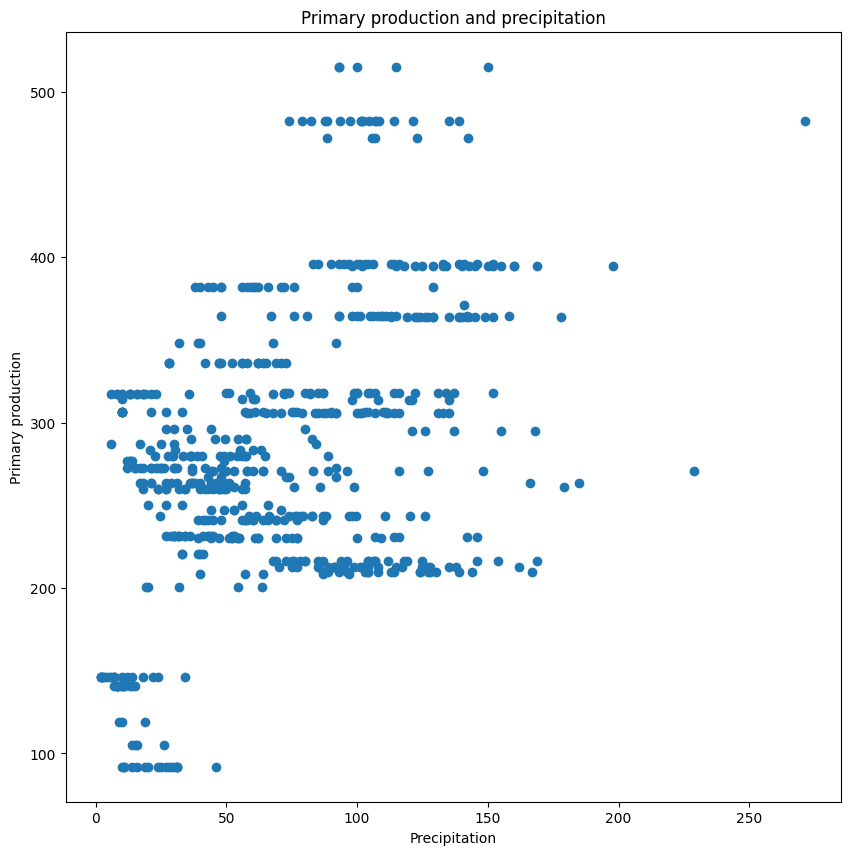

In [19]:
plt.figure(figsize=(10, 10))
# plt.scatter(data["precipitation"], data["primary_prod"])
plt.scatter(data["primary_prod"], data["precipitation"])
plt.xlabel("Precipitation")
plt.ylabel("Primary production")
plt.title("Primary production and precipitation")
plt.show()

In [20]:
data.isna().sum()

site_id            0
grazingpressure    0
year               0
precipitation      0
primary_prod       0
dtype: int64

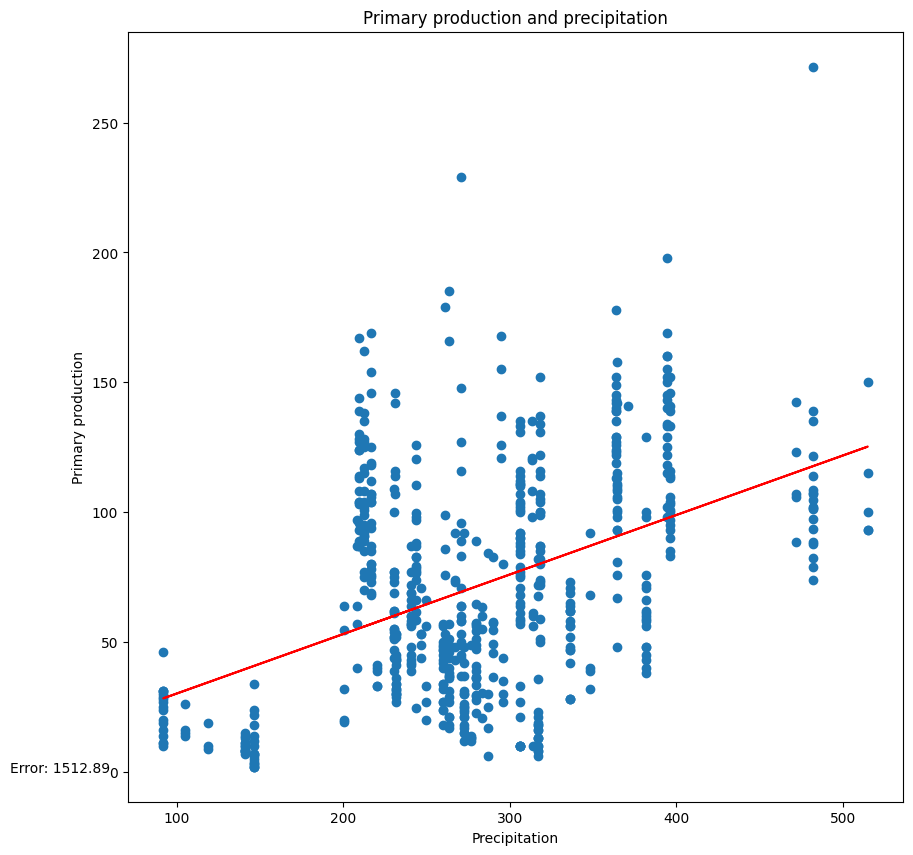

In [21]:
# Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = data["precipitation"].values.reshape(-1, 1)
y = data["primary_prod"].values

model.fit(X, y)
model.score(X, y)

avg_error = np.mean((model.predict(X) - y) ** 2)
plt.figure(figsize=(10, 10))
plt.scatter(data["precipitation"], data["primary_prod"])
plt.plot(data["precipitation"], model.predict(X), color = "red")
plt.text(0, 0, f"Error: {avg_error:.2f}")
plt.xlabel("Precipitation")
plt.ylabel("Primary production")
plt.title("Primary production and precipitation")
plt.show()

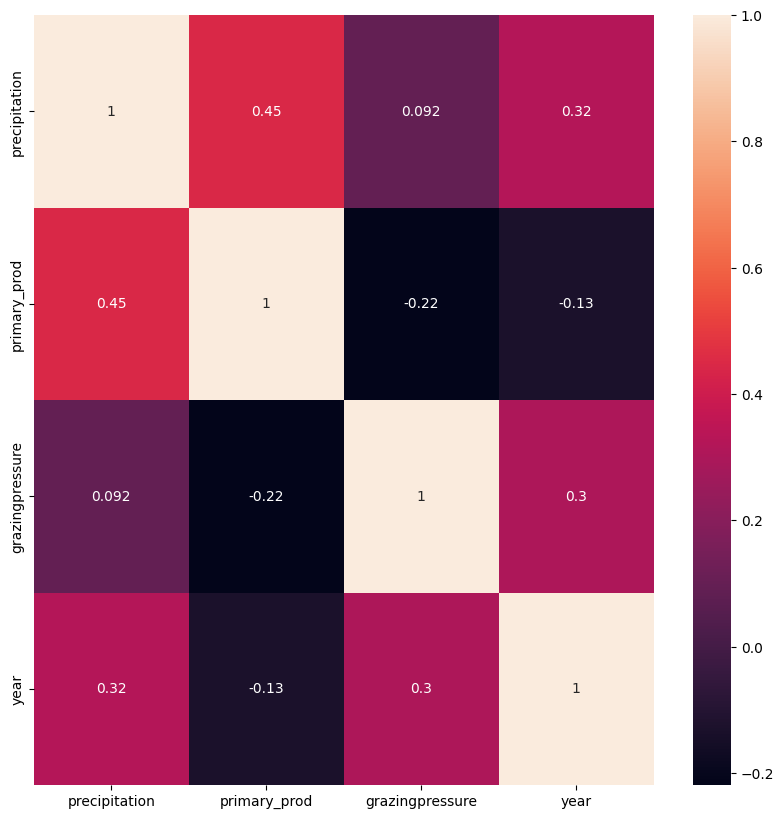

In [23]:
# Correlation plot
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(data[["precipitation", "primary_prod", "grazingpressure", "year"]].corr(), annot=True)
plt.show()